# Setup

In [9]:
import numpy as np
import openai
import llmlex
import matplotlib.pyplot as plt
import time

In [10]:
funcs = [lambda x: (np.abs(np.sin(x))**0.5),
            lambda x: np.exp(( 1.83169 + (-3.35509 * (1 / x)))),
            lambda x: (x**3.),
            lambda x: ((1.44439 + (x**0.5)) * (np.pi + np.log(x))),
            lambda x: (3.09529 * (x**3.)),
            lambda x: ((np.pi + (x**3.))**2),
            lambda x: (51.2288 * np.cos((1.18219 * x))),
            lambda x: (-55.0512 * (1.0+(x**0.5))),
            lambda x: x,
            lambda x: (-0.0126997 + np.exp(np.cos(x))),
            lambda x: (1.54251 + (-1. * x)),
            lambda x: ((np.exp(2*x))),
            lambda x: (4.01209 + np.exp(x)),
            lambda x: ((-1. * np.pi) + (0.729202 * (x**0.5))),
            lambda x: (1.99594 + x + (-3. * ( x**3.))),
            lambda x: np.log(x+1),
            lambda x: np.sin(np.log((4.1746 * (1 / x)))),
            lambda x: (4.67315 + np.cos(np.exp(x))),
            lambda x: np.exp((-x))+2*np.exp(-3*x),
            lambda x: ((x**-3.) * np.sin(x))
            ]

print(len(funcs))

20


In [11]:

model = "codestral"

client = openai.OpenAI(
    base_url="http://0.0.0.0:11434/v1",
    api_key="ollama" # This can be any non-empty string
)

# Run 1

## Search

In [12]:
xVals = np.linspace(0.1, 5, 100)
count = 0
population_size = 25
num_of_generations = 10
res_list = []

# only finish this block if 'results_{model}.pkl' does not exist
try:
    import pickle
    with open(f"results_{model}.pkl", 'rb') as f:
        res_list, compute_times = pickle.load(f)
    print("Results already computed. Exiting.")
    
except FileNotFoundError:
    print("Results not found. Proceeding with computation.")

    compute_times = []
    for func in funcs:
        start_time = time.time()
        print(f"Function {count}")
        count+=1
        y = func(xVals)
        fig, ax = plt.subplots()
        plt.xticks([xVals[0], xVals[-1]], ['%2.f' % xVals[0], '%2.f' % xVals[-1]])
        plt.yticks([min(y), max(y)], ['%2.f' % min(y), '%2.f' % max(y)])
        base64_image = llmlex.images.generate_base64_image(fig, ax, xVals, y)
        plt.show()
        if 'gpt' in model: start = llmlex.llm.check_key_limit(client)
        res = llmlex.run_genetic(client, base64_image, xVals, y, population_size,num_of_generations, 
                                temperature=1., model=model, system_prompt=None, elite=True, use_async=True, exit_condition=1e-7)
        res_list.append(res)
        compute_times.append(time.time() - start_time)
        if 'gpt' in model: print(f"Credits spent: {start - LLM_LEx.llm.check_key_limit(client)}")


Results already computed. Exiting.


## Compare

Function 0
params[0] / (1 + np.exp(-(x - params[1])/params[2])) + params[3]*np.cos(params[4]*x + params[5])*np.exp(-abs((x-params[6])/params[7])) + params[8]/((params[9] + x)**params[10]) - params[11]*np.sin(params[12]*x)*np.exp(-params[13]*x)
[ 1.09093565e+00  2.67808735e-01  3.93819243e-01  7.81080408e+00
  2.86329591e-03 -4.60140978e+00  3.13872923e+00  5.76521826e-01
 -2.56288349e+01  1.36956516e+00  1.40951101e+01 -2.53808156e-09
  9.93337312e-01 -3.44220181e+00]
-0.0042964993044734


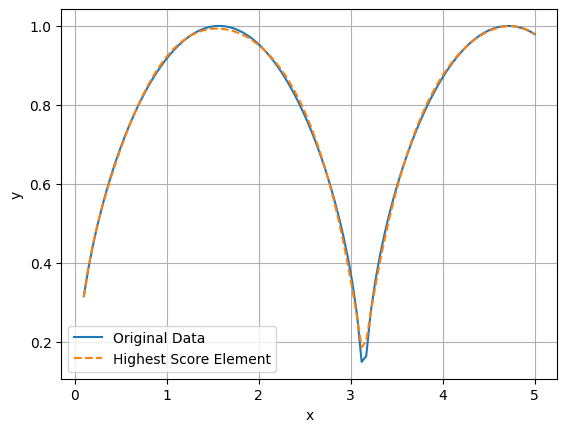

Function 1
params[0]*np.exp(-((x - params[1])/params[2])**2) + params[3]*np.exp(-((x - params[4])/params[5])**2) + params[6]*np.exp(-params[7]/x)
[  48.40688548 -188.97007949    1.42091069  -48.08108096  190.61056261
    0.36991127    6.24443083    3.35509   ]
-1.0712596277805233e-27


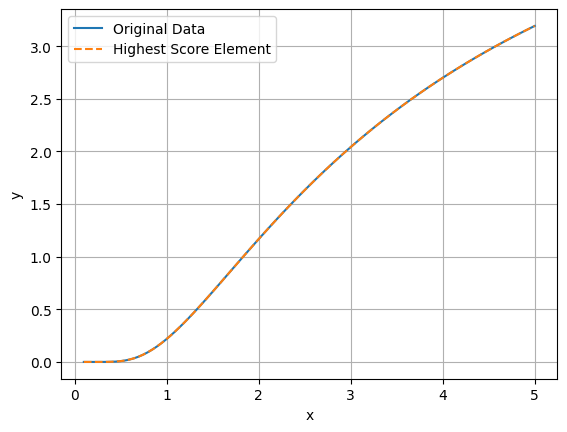

Function 2
 params[0] * np.power(x, params[1]) * np.exp(-params[2] * x)
[9.99999969e-01 3.00000009e+00 2.40476747e-08]
-2.4691564623473265e-17


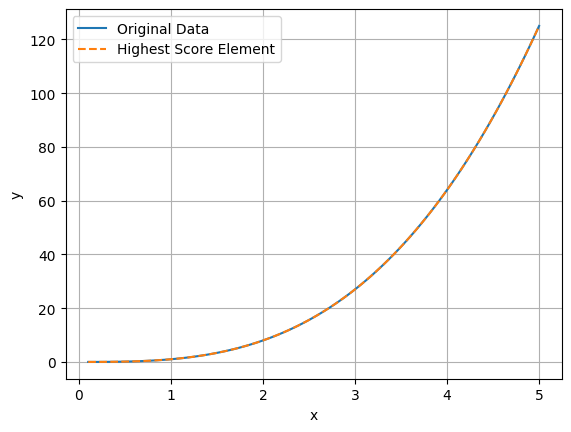

Function 3
(params[0] / np.exp(params[1]*x) + params[2]*np.power(x, params[3]) + params[4]*np.log(abs(x)) +  params[5])/(1/ (abs(((x - params[6]) / params[7]))**params[8] + 1) + np.abs(params[9]))
[-0.52144598  0.08879564  9.2697504   0.62763452  4.09081561 12.0809624
 -0.03963655  2.46536612  0.55147642  2.10132267]
-4.3869699149039684e-17


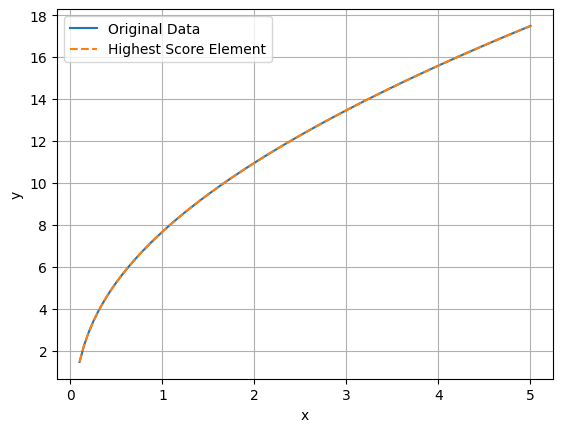

Function 4
 params[0] * x**3 + params[1] * x + params[2]
[ 3.09529001e+00 -2.67133138e-07  1.99932747e-07]
-2.0880923866815003e-17


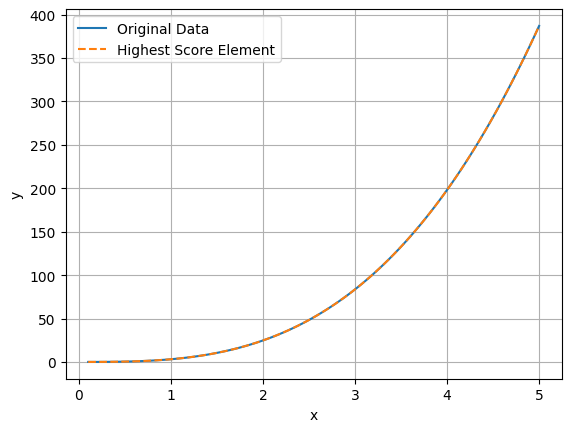

Function 5
 params[0] * ((1 / (np.sqrt(2 * np.pi) * params[1])) * np.exp(-0.5 * ((x - params[2]) / params[1]) ** 2)) + (params[3] * np.sin(params[4]*x + params[5])) + (params[6] * x**params[7]) + params[8]
[1082.2492112     1.62606929    4.9838725     3.29092665    1.7503056
    2.65783817    1.12048718    5.94991745    5.97452542]
-1.1375288905268732e-10


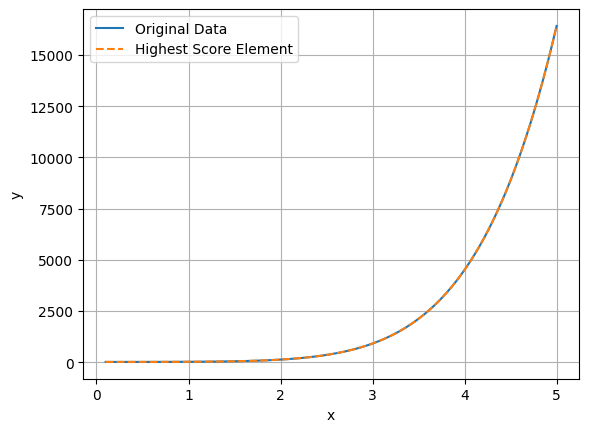

Function 6
 params[0] + params[1] * np.exp(-((x - params[2])/ params[3])**2) * np.cos(params[4] * x)
[-1.20119250e-09  5.12288000e+01  2.91886518e-02  1.90826020e+05
  1.18219000e+00]
-4.0123154937837537e-20


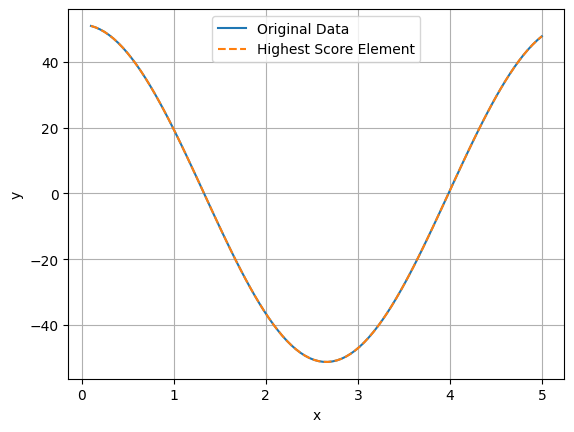

Function 7
 params[0] * x ** params[1] + params[2]
[-55.0512   0.5    -55.0512]
-2.179703893303207e-31


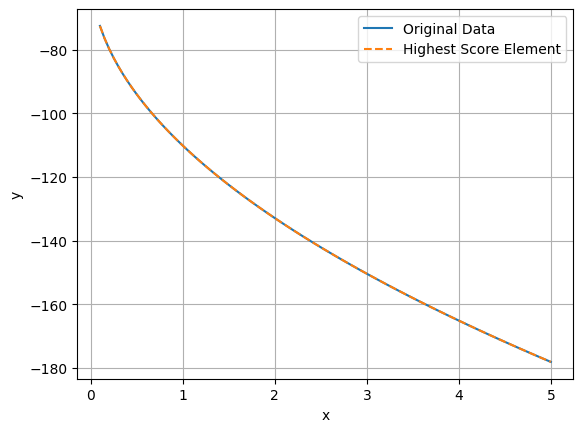

Function 8
 x + params[0]
[2.5843447e-10]
-4.3621340522415504e-20


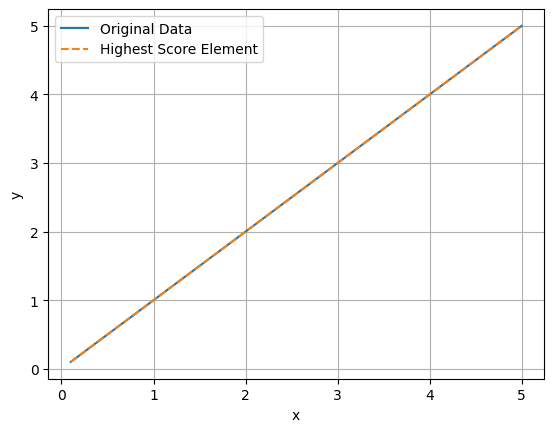

Function 9
 params[0] * (1 / (1 + np.exp(-(params[1]*x - params[2])))) * np.exp(((x-params[3])*(x-params[4]))/((2*params[5])**2) - np.abs(x-params[6])/params[7] + 0.5*np.sin(params[8]*x)/params[9]) + params[10] * np.sin(params[11]*x + params[12]) * np.exp(-x/params[13]) + params[14] / (x**params[15] + params[16]) + params[17] * np.log(x + params[18])
[  0.06648703   1.69243697   5.87117747 -26.74608383 -26.74172779
   8.52525867   0.9644885   19.82950871   1.27137345   1.12294047
   2.35594012   1.63521008  -0.90252365   0.54545394   2.46194085
   1.28987193   0.68017262  -0.39232814   0.09335745]
-3.2682005990380958e-09


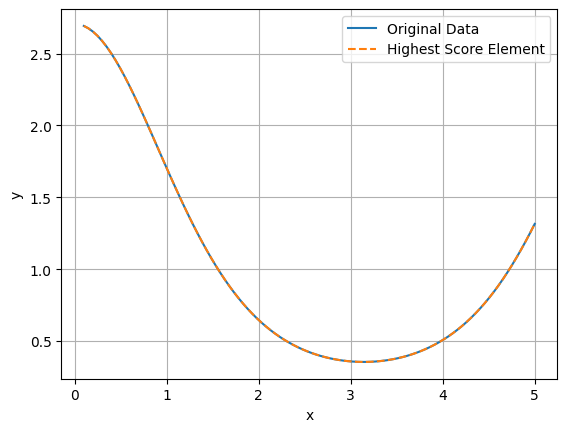

Function 10
params[0] * x + params[1]
[-1.       1.54251]
-0.0


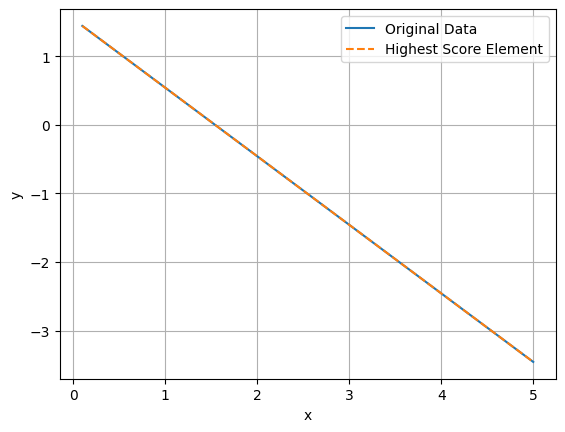

Function 11
 params[0]*np.exp(params[1]*x) + params[2]
[9.99999999e-01 2.00000000e+00 2.67247791e-07]
-1.7912062633340718e-18


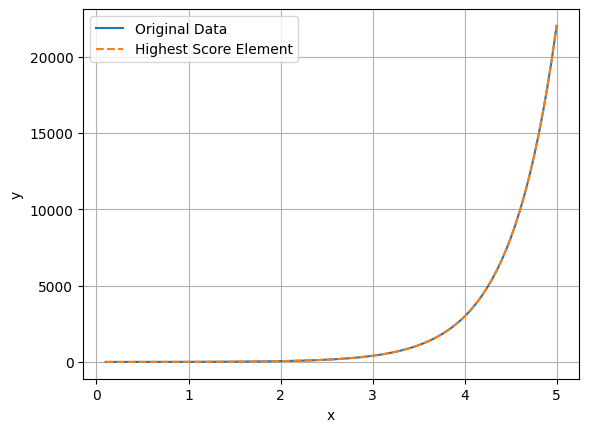

Function 12
params[0]*np.exp(x*params[1]) + params[2]
[1.      1.      4.01209]
-5.328389409085281e-31


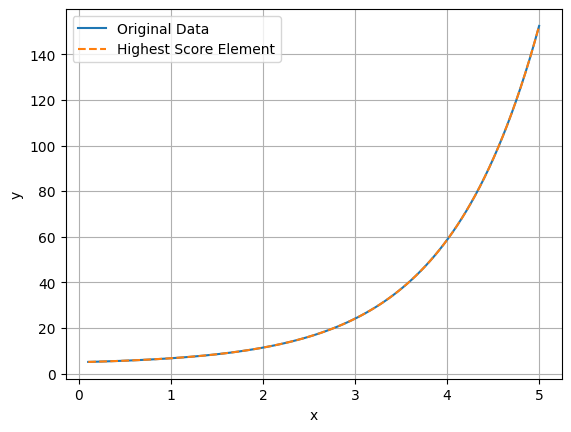

Function 13
params[0] * np.sqrt(x) + params[1]
[ 0.729202   -3.14159265]
-6.9326307482400475e-31


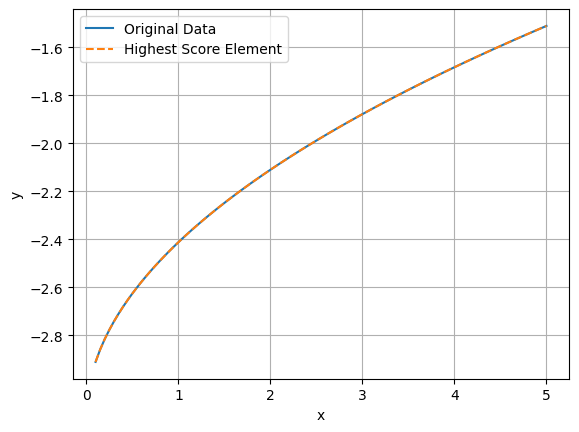

Function 14
 params[0] + params[1]*x + params[2]*np.log(x) + params[3]*np.exp(x/params[4]) - params[5]*np.sin(x*params[6])
[ 2.00653025e+00 -3.04639758e+04 -4.85868939e-03 -2.12665207e-02
  1.45125766e+00  1.25372622e+06 -2.42995681e-02]
-1.7555915055034177e-10


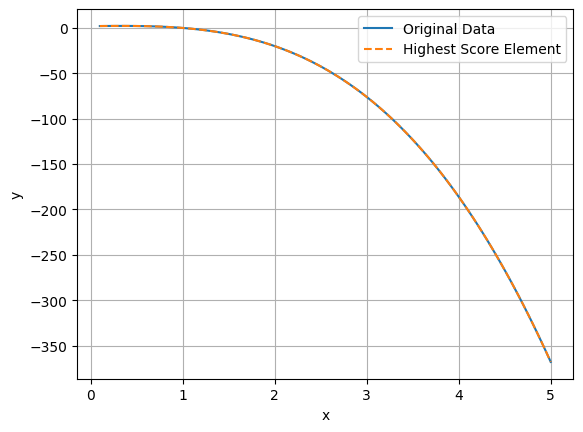

Function 15
params[0]/x**2 + params[1]*np.log(x + params[2])
[5.1114674e-12 1.0000000e+00 1.0000000e+00]
-4.7147078329974877e-20


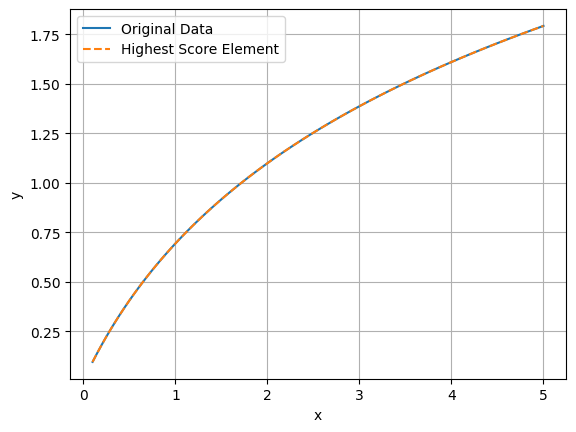

Function 16
 params[0]*np.tanh(params[1]*(x - params[2])) / (params[3]*x**params[4] + params[5]) + params[6]*np.sin(params[7]*x) / np.sqrt((x - params[8])**2 + params[9]) + params[10] - params[11]*x ** params[12]  # ansatz formula for the given image data
[1.81615148 1.23863788 0.35423525 2.70367288 1.36201893 0.34779847
 0.18157465 0.9081133  1.1087722  1.70020152 0.63656391 0.15114704
 1.07045088]
-3.602377418587821e-08


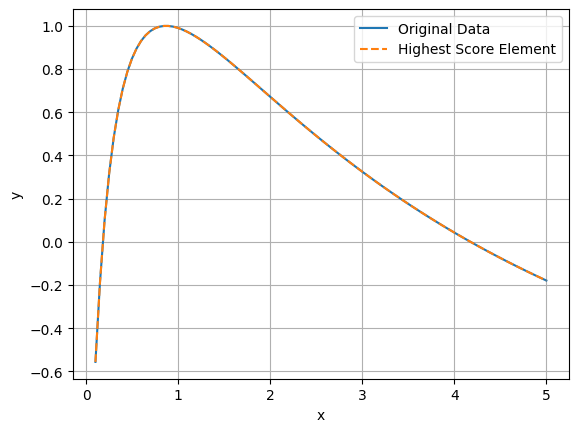

Function 17
 (params[0]/(x+params[3])**params[4])*np.exp(-params[1]*x)*np.cos(params[2]*x) + params[5] * np.tanh(((x-params[6])/params[7])) + params[8] / (np.sqrt((((x-params[9])/params[10])**2) + 1)) + params[11]*np.sin(params[12]*x) + params[13]*np.exp(-((x - params[14]) ** 2) / ((params[15]**2)))
[ 6.96985321 -0.18200846  1.2863768   0.38392365  0.52918901  5.892092
  2.41426808  0.20238563 -3.4889456   2.72047384  0.07985104  9.57523447
  0.88550456  7.13951565  1.96942834  0.57005029]
-0.5209124088287354


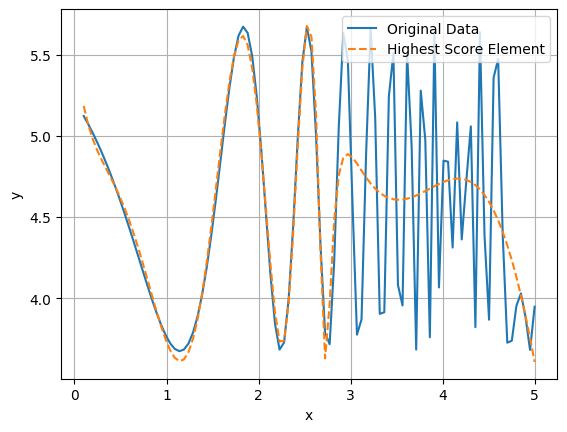

Function 18
params[0]*np.exp(-params[4]*x)*np.sin(params[1]*x + params[2]) + params[3]*np.exp(-params[5]*x)*np.cos(params[6]*x + params[7])
[1.00093911e+00 1.10243514e-05 1.61411633e+00 2.61131474e+00
 9.99999543e-01 2.99969694e+00 3.61033650e-04 6.98359979e-01]
-4.1781025088951436e-17


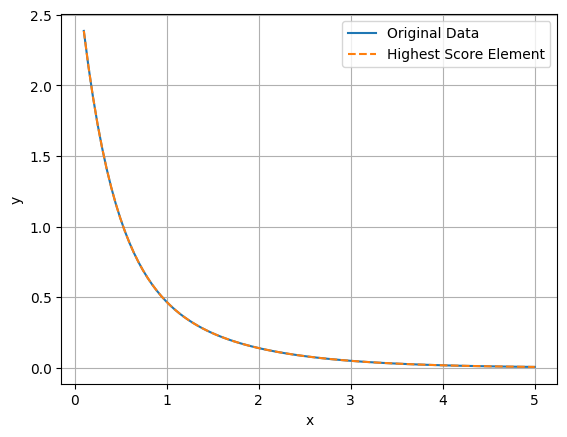

Function 19
 np.log(params[0] * x ** params[1]) / (np.cosh((x - params[2]) / params[3]) + params[4]) - params[5] / np.sqrt(params[6] + x ** params[7]) + params[8] * np.sin(params[9] * x)
[ 5.96271560e-01  1.96650692e-03  1.23452030e-01  1.71639339e+00
  2.11709915e+00 -1.00003771e+00 -4.21306998e-10  3.99997125e+00
  5.19908871e-04  1.37634263e+00]
-2.3156102035848392e-10


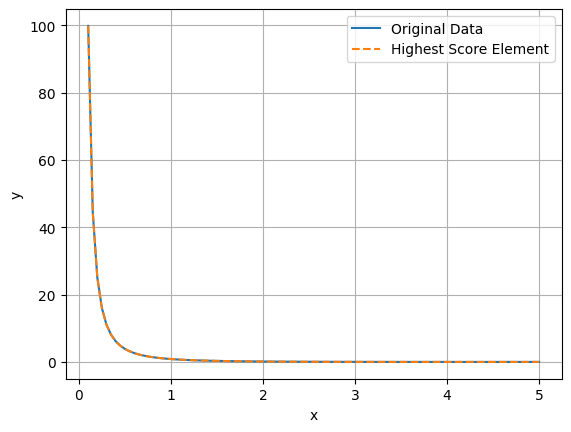

In [13]:
for index in range(len(res_list)):
    print(f"Function {index}")
    y = funcs[index](xVals)
    res = res_list[index]
    highest_score_element = max((item for sublist in res for item in sublist), key=lambda item: item['score'])
    print(highest_score_element['ansatz'])
    print(highest_score_element['params'])
    print(highest_score_element['score'])

    # Extract the parameters and the ansatz function from the highest_score_element
    params = highest_score_element['params']
    ansatz = highest_score_element['ansatz']

    # Define the ansatz function
    def ansatz_function(x, params):
        return eval(ansatz)

    # Plot the original data
    plt.plot(xVals, y, label='Original Data')

    # Plot the highest score element
    plt.plot(xVals, ansatz_function(xVals, params), label='Highest Score Element', linestyle='--')

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
# print compute times in minutes and seconds 
for time in compute_times:
    minutes = int(time // 60)
    seconds = int(time % 60)
    print(f"Compute time: {minutes} minutes and {seconds} seconds")

Compute time: 37 minutes and 32 seconds
Compute time: 8 minutes and 44 seconds
Compute time: 3 minutes and 15 seconds
Compute time: 8 minutes and 31 seconds
Compute time: 1 minutes and 20 seconds
Compute time: 17 minutes and 0 seconds
Compute time: 2 minutes and 35 seconds
Compute time: 2 minutes and 59 seconds
Compute time: 1 minutes and 37 seconds
Compute time: 27 minutes and 0 seconds
Compute time: 1 minutes and 17 seconds
Compute time: 1 minutes and 17 seconds
Compute time: 1 minutes and 10 seconds
Compute time: 1 minutes and 41 seconds
Compute time: 1 minutes and 4 seconds
Compute time: 4 minutes and 28 seconds
Compute time: 14 minutes and 4 seconds
Compute time: 39 minutes and 9 seconds
Compute time: 3 minutes and 29 seconds
Compute time: 33 minutes and 56 seconds


In [15]:
all_results = [res_list, compute_times]
# Save the results to a file
import pickle
with open(f'results_{model}.pkl', 'wb') as f:
    pickle.dump(all_results, f)